# Assignment 3

### MACSS 3000, Dr. Evans

### Ellen Hsieh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### 2. Simulating your income

#### (a) Simulate 10,000 different realizations of my lifetime income

$$
\begin{aligned} 
\ln(\textit{inc}_{2020}) &= \ln(\textit{inc}_0) + \ln(\varepsilon_{2020}) \\
\ln(\textit{inc}_{t})    &= (1-\rho) [\ln(\textit{inc}_0) + g(t-2020)] 
                         + \rho \ln(\textit{inc}_{t-1}) + \ln(\varepsilon_{t}) \ \
                          \forall 2021 \leq t \leq 2059
\end{aligned} 
$$

In [2]:
# create a simulation model for MACSS students lifetime income
def macss_income_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'inc'         : 80000,      #starting income
        'rho'         : 0.4,        #dependence of today’s income on last period’s income
        'mu'          : 0,          #mean
        'sd'          : 0.13,       #standard deviation
        'gr'          : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'wr_years'    : 40,         #years to work
        'num_draws'   : 10000       #simulations
    }
    """    

    #set random seed
    np.random.seed(524)

    inc_errors = np.random.normal(p['mu'], p['sd'] , (p['wr_years'], p['num_draws']))

    #create a matrix of dim (wr_years, num_draws)
    ln_macss_inc = np.zeros((p['wr_years'], p['num_draws']))

    #fill the matrix
    ln_macss_inc[0, :] = np.log(p['inc']) + inc_errors[0, :]

    #loop and apply model
    for yr in range(1, p['wr_years']):
        ln_macss_inc[yr, :] = ((1- p['rho']) * (np.log(p['inc']) + p['gr']* yr) + 
                                               p['rho'] * ln_macss_inc[yr - 1, :] + inc_errors[yr, :])
    
    macss_inc = np.exp(ln_macss_inc) 
    return macss_inc

In [3]:
# simulate the lifetime income with initial income = 80000, mu = 0, sd = 0.13, g = 0.025
simulation_profile = {
    'inc'         : 80000,      
    'rho'         : 0.4,        
    'mu'          : 0,          
    'sd'          : 0.13,        
    'gr'          : 0.025,      
    'st_year'     : int(2020),  
    'wr_years'    : 40, 
    'num_draws'   : 10000       
    }

macss_inc = macss_income_sim(simulation_profile)
print(macss_inc)

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


Text(0,0.5,'Annual Income (\\$s)')

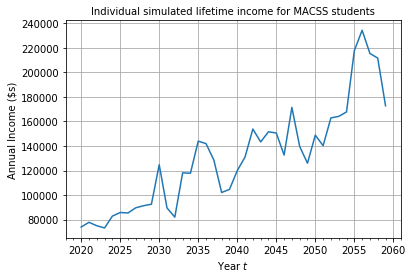

In [4]:
# plot the lifetime income path of individual 214
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['wr_years'])
individual = 214
fig, ax = plt.subplots()
plt.plot(year_vec, macss_inc[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income for MACSS students', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')

#### (b) Plot a histogram with 50 bins of year t = 2020 initial income for each of the 10,000 simulations

Text(0.5,1,'MACSS class of 2020 in Income Bins')

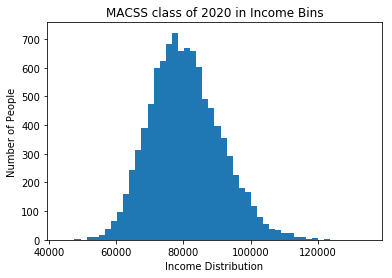

In [5]:
# plot the histogram
plt.hist(macss_inc[0,:], bins=50)
plt.xlabel("Income Distribution")
plt.ylabel("Number of People")
plt.title("MACSS class of 2020 in Income Bins")

This districution is normally distributed but a little bit skewed to the right.

In [6]:
income = macss_inc[0, :]
len(income [income > 100000]) / len(income)

0.0417

4.17% of the class will earn more than $100,000 in the first year.

In [7]:
income = macss_inc[0, :]
len(income [income < 70000]) / len(income)

0.1512

15.12% of class will earn less than 70,000 in the first year.

#### (c) Plot the histogram of how many years it takes to pay the loan in each of your 10,000 simulations 

In [8]:
# calculate the number of years to pay off the loan
loan = 0.1 * macss_inc

year_to_payoff = []
for i in range(10000):
    paid=loan[:,i][0]
    for j in range(1,40):
        if paid < 95000: 
            paid = paid + loan[:,i][j]
        else:
            year_to_payoff.append(j)
            break

Text(0.5,1,'Years to Pay Off Load')

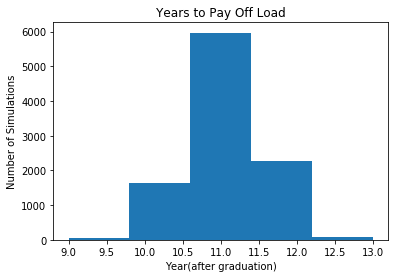

In [9]:
# plot the histogram
plt.hist(year_to_payoff, bins=5)
plt.xlabel("Year(after graduation)")
plt.ylabel("Number of Simulations")
plt.title("Years to Pay Off Load")

In [10]:
# calculate the percentage of the simulations which can pay off the loan in 10 years
perc_before_10y = 0

for i in range(10000):
    if year_to_payoff[i] <= 10:
        perc_before_10y += 1
        
perc_before_10y/10000

0.1678

16.78% of the simulations are able to pay off the loan in 10 years.

#### (d) Plot the new histogram of how many years it takes to pay your loan of according to new income and standard deviation

In [11]:
# new prifile to simulate
new_simulation_profile = {
    'inc'         : 90000,      
    'rho'         : 0.4,        
    'mu'          : 0,          
    'sd'          : 0.17,        
    'gr'          : 0.025,      
    'st_year'     : int(2020),  
    'wr_years'    : 40,         
    'num_draws'   : 10000       
    }

new_macss_inc = macss_income_sim(new_simulation_profile)
print(new_macss_inc)

[[ 70550.46142451 117783.33011091 123561.20729139 ... 118483.24080508
   78992.81966812  73764.25171169]
 [ 89615.63768821  71575.56495871  96317.75493523 ...  72778.88084775
   81644.3347736   90400.57899801]
 [ 82955.30101689  69396.06916251 106035.55593099 ...  70956.3661129
  103848.93176006  89949.09077038]
 ...
 [338309.11761165 252187.52025149 203293.03644369 ... 168361.21927259
  308250.29858492 240024.49205936]
 [271061.07048342 227502.32436192 220836.5697397  ... 223095.32811759
  239983.96514044 231788.44418303]
 [219057.46748997 172865.33333479 183245.71710131 ... 295275.8618388
  273090.00167035 253934.86273481]]


In [12]:
# calculate the new number of years to pay off the loan
loan = 0.1 * new_macss_inc

new_year_to_payoff = []
for i in range(10000):
    paid=loan[:,i][0]
    for j in range(1,40):
        if paid < 95000: 
            paid = paid + loan[:,i][j]
        else:
            new_year_to_payoff.append(j)
            break

Text(0.5,1,'Years to Pay Off Load')

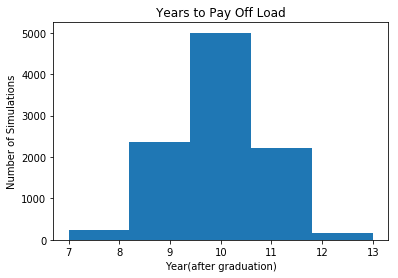

In [13]:
# plot the new histogram
plt.hist(new_year_to_payoff, bins=5)
plt.xlabel("Year(after graduation)")
plt.ylabel("Number of Simulations")
plt.title("Years to Pay Off Load")

In [14]:
# new percentage of simulations which can pay off the loan in 10 years
new_perc_before_10y = 0

for i in range(10000):
    if new_year_to_payoff[i] <= 10:
        new_perc_before_10y += 1
        
new_perc_before_10y/10000

0.7602

76.02% of the simulations are able to pay off the loan in 10 years.